In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('Mall_Customers.csv')

In [4]:
data.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
4,5,Female,31,17,40
113,114,Male,19,64,46
50,51,Female,49,42,52
183,184,Female,29,98,88
33,34,Male,18,33,92


In [5]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]

In [6]:
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
43,39,61
2,16,6
150,78,17
187,101,68
160,79,35


In [7]:
data = data.rename(columns ={'Annual Income (k$)':'income','Spending Score (1-100)':'score'})

In [8]:
data.sample(5)

,income,score
81,54,55
15,20,79
97,60,50
139,74,72
159,78,73


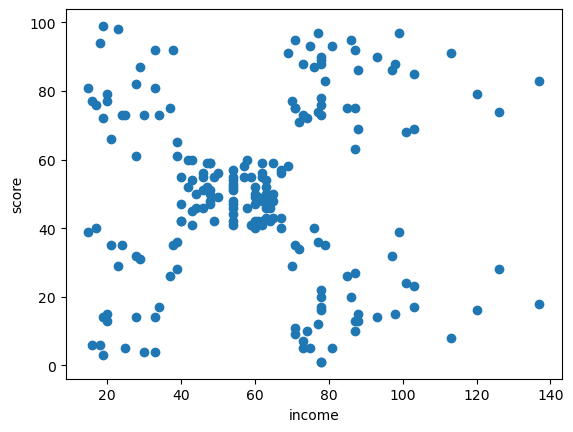

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('income')
plt.ylabel('score')
plt.scatter(data['income'],data['score'])

In [10]:
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error =[]
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['income','score']])
    wcss_error.append(model.inertia_)

C:\softwares\anaconda3\envs\sinhala\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\softwares\anaconda3\envs\sinhala\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\softwares\anaconda3\envs\sinhala\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\softwares\anaconda3\envs\sinhala\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMe

In [11]:
wcss_error

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37239.835542456036,
 30566.45113025186,
 25011.839349156595,
 21900.341350107527,
 19740.010370359305]

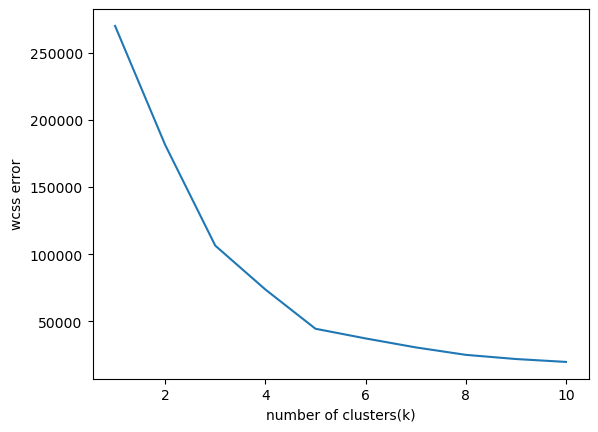

In [12]:
plt.xlabel('number of clusters(k)')
plt.ylabel('wcss error')
plt.plot(k_values,wcss_error)

In [13]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
pred = model.fit_predict(data)    


C:\softwares\anaconda3\envs\sinhala\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
data.head(5)

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [15]:
data['cluster']=pred

In [16]:
data.head(5)

,income,score,cluster
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


In [17]:
c1=data[data['cluster']==0]
c1.head(5)

,income,score,cluster
1,15,81,0
3,16,77,0
5,17,76,0
7,18,94,0
9,19,72,0


In [18]:
c2=data[data['cluster']==1]
c2.head(5)

,income,score,cluster
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1


In [19]:
c3=data[data['cluster']==2]
c3.head(5)

,income,score,cluster
43,39,61,2
46,40,55,2
47,40,47,2
48,40,42,2
49,40,42,2


In [20]:
c4=data[data['cluster']==3]
c4.head(5)

,income,score,cluster
124,70,29,3
128,71,11,3
130,71,9,3
134,73,5,3
136,73,7,3


In [21]:
c5=data[data['cluster']==4]
c5.head(5)

,income,score,cluster
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4


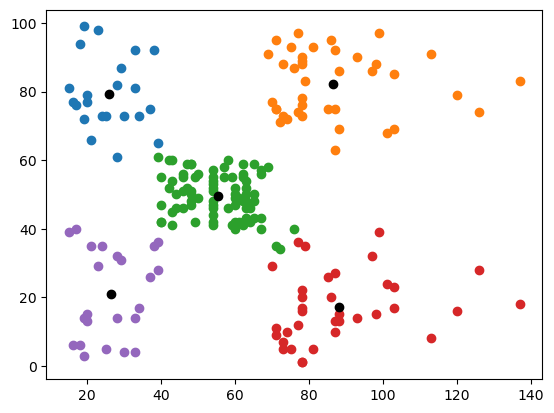

In [28]:
plt.scatter(c1['income'],c1['score'])
plt.scatter(c2['income'],c2['score'])
plt.scatter(c3['income'],c3['score'])
plt.scatter(c4['income'],c4['score'])
plt.scatter(c5['income'],c5['score'])
plt.scatter (model.cluster_centers_[:,0],model.cluster_centers_[:,1], color='black')

In [24]:
model.cluster_centers_

array([[25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])